Geospatial Data Analysis Exercises Kaggle

Types of Forests in the US

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
full_data = gpd.read_file("geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [3]:
full_data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [4]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = full_data.loc[full_data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<AxesSubplot:>

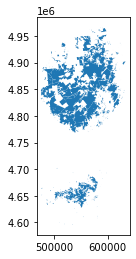

In [5]:
wild_lands.plot()

In [6]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

<AxesSubplot:>

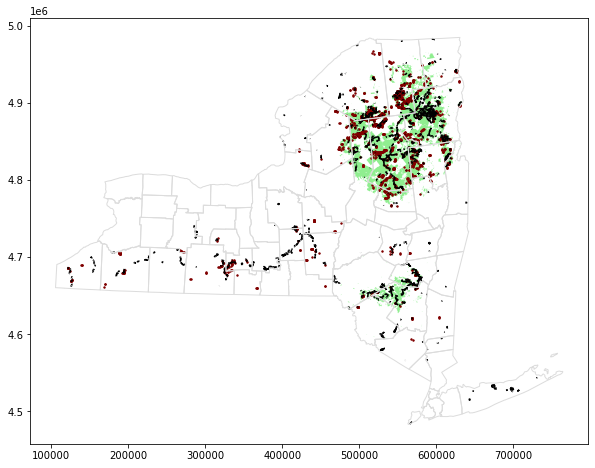

In [7]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

Ghana Health Facilities

In [8]:
regions = gpd.read_file("geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

EPSG:32630


In [9]:
# Create a DataFrame with health facilities in Ghana, using a CSV file
facilities_df = pd.read_csv("geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

C:\Users\slyth\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


<AxesSubplot:>

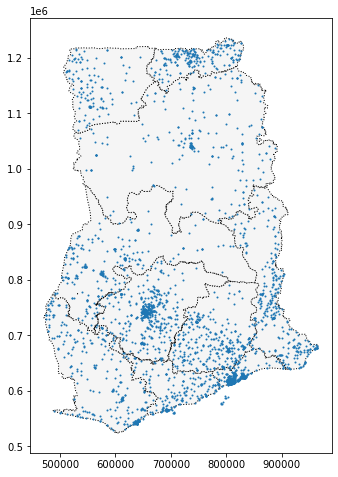

In [10]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [11]:
# Get the x-coordinate of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [12]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


Interactive Crime Maps

In [13]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [14]:
# Create a map, location being the latitude and longitude of Boston
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

In [15]:
# Create a DataFrame with crimes in Boston, using a CSV file and using that encoding phrase because of utf-8 error
crimes = pd.read_csv("geospatial-learn-course-data/crimes-in-boston/crimes-in-boston/crime.csv", encoding='windows-1252')
codes = pd.read_csv("geospatial-learn-course-data/crimes-in-boston/crimes-in-boston/offense_codes.csv", encoding='windows-1252')

In [16]:
#Remove NAs
crimes = crimes.dropna()

#Number of rows
len(crimes)

971

In [17]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


In [18]:
#Focus on specific crimes
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]

len(daytime_robberies)

6

In [19]:
# Create a map
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(m_2)

# Display the map
m_2

In [20]:
# Declutter a map with many pins
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in crimes.iterrows():
    mc.add_child(Marker([row['Lat'], row['Long']]))
m_3.add_child(mc)

# Display the map
m_3

In [21]:
#Bubblemap instead
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

#Specify what values have which colour
def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

for i in range(0,len(crimes)):
    Circle(
        location=[crimes.iloc[i]['Lat'], crimes.iloc[i]['Long']],
         radius=20,
        color=color_producer(crimes.iloc[i]['HOUR'])).add_to(m_4)

# Display the map
m_4

In [22]:
#Or as a heatmap
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
m_5

Geocoding

In [23]:
from geopy.geocoders import Nominatim

In [24]:
geolocator = Nominatim(user_agent="kaggle_learn")
location = geolocator.geocode("Pyramid of Khufu")
point = location.point
print("Latitude:", point.latitude)
print("Longitude:", point.longitude)

Latitude: 29.97916
Longitude: 31.134215625236113


In [25]:
#geocoding multiple location names from a csv
universities = pd.read_csv("geospatial-learn-course-data/top_universities.csv")

#Remove NAs
universities = universities.dropna()


universities.head()

,Name
0,University of Oxford
1,University of Cambridge
2,Imperial College London
3,ETH Zurich
4,UCL


In [26]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

universities[['Latitude', 'Longitude']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(universities["Latitude"])) / len(universities)) * 100))

# Drop universities that were not successfully geocoded
universities = universities.loc[~np.isnan(universities["Latitude"])]
universities = gpd.GeoDataFrame(
    universities, geometry=gpd.points_from_xy(universities.Longitude, universities.Latitude))
universities.crs = {'init': 'epsg:4326'}
universities.head()

95.0% of addresses were geocoded!


C:\Users\slyth\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Name,Latitude,Longitude,geometry
0,University of Oxford,33.650290,-117.828179,POINT (-117.82818 33.65029)
1,University of Cambridge,52.210946,0.092005,POINT (0.09200 52.21095)
2,Imperial College London,51.498959,-0.175641,POINT (-0.17564 51.49896)
3,ETH Zurich,47.376426,8.547671,POINT (8.54767 47.37643)
4,UCL,51.521785,-0.135151,POINT (-0.13515 51.52179)


In [27]:
# Create the map
m = folium.Map(location=[54, 15], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in universities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(m)

# Display the map
m

Proximity Analysis

In [28]:
releases = gpd.read_file("geospatial-learn-course-data/toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp") 
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [29]:
stations = gpd.read_file("geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,...,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,...,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,...,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,...,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)


In [30]:
# Select one release incident in particular
recent_release = releases.iloc[360]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [31]:
print('Mean distance to monitoring stations: {} feet'.format(distances.mean()))

print('Closest monitoring station ({} feet):'.format(distances.min()))

print(stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]])

Mean distance to monitoring stations: 33516.28487007786 feet
Closest monitoring station (3780.623590556444 feet):
ADDRESS      3100 Penrose Ferry Road
LATITUDE                    39.91279
LONGITUDE                 -75.185448
Name: 9, dtype: object


In [32]:
#Buffer zone to get a radius
#5280 is the feet in 1 mile

two_mile_buffer = stations.geometry.buffer(2*5280)

In [33]:
# Create map with release incidents and monitoring stations
m = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m)
    
# Plot each polygon on the map
folium.GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m)

# Show the map
m

Exercise: Bird Migration

In [34]:
birds = pd.read_csv("geospatial-learn-course-data/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds["tag-local-identifier"].nunique()))
birds.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [35]:
birds = birds.rename(columns={ birds.columns[1]: "Longitude" })
birds = birds.rename(columns={ birds.columns[2]: "Latitude" })

birds.head()

,timestamp,Longitude,Latitude,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [36]:
# Convert the DataFrame to a GeoDataFrame
birds = gpd.GeoDataFrame(birds, geometry=gpd.points_from_xy(birds.Longitude, birds.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
birds.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
birds.head()

C:\Users\slyth\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,timestamp,Longitude,Latitude,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [37]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

C:\Users\slyth\AppData\Local\Temp\ipykernel_20316\2146633488.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<AxesSubplot:>

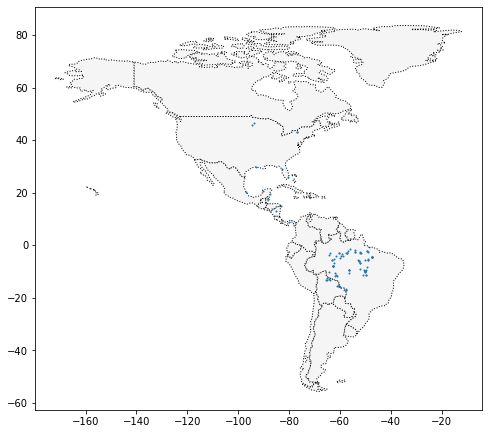

In [38]:
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
birds.to_crs(epsg=4326).plot(markersize=1, ax=ax)

Corvid Map Hinckley

In [39]:
df = pd.read_csv("corvids_hinckley.csv")
df.head()

,Latitude,Longitude,Species,Location,Patch Type,Date,Season,Count,Behaviour
0,52.551545,-1.389970,Carrion crow,Lawn,"large, open, intermittent human presence",17.5.23,Spring,1,"foraging under mown grass, flew onto roof when..."
1,52.551087,-1.389981,Carrion crow,Roof,"open, no human presence",21.5.23,Spring,1,walking
2,52.551137,-1.389626,Carrion crow,Lamp,"open, no human presence",22.5.23,Spring,1,flew from house onto lamp post with food in be...
3,52.551227,-1.389948,Carrion crow,Roof,"open, no human presence",23.5.23,Spring,1,perched
4,52.551201,-1.390946,Carrion crow,Roof,"open, no human presence",24.5.23,Spring,1,perched


In [40]:
crows = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
crows.crs = {'init': 'epsg:4326'}

C:\Users\slyth\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [41]:
# Declutter a map with many pins
d1 = folium.Map(location=[52.5455, -1.3767], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in crows.iterrows():
    mc.add_child(Marker([row['Latitude'], row['Longitude']]))
d1.add_child(mc)

# Display the map
d1

In [42]:
#Heatmap
#Or as a heatmap
h1 = folium.Map(location=[52.5455, -1.3767], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crows[['Latitude', 'Longitude']], radius=10).add_to(h1)

# Display the map
h1